# Problem Statement

Twitter has now become a useful way to build one's business as it helps in giving the brand a voice and a personality. The platform is also a quick, easy and inexpensive way to gain valuable insight from the desired audience. Identifying the sentiments about the product/brand can help the business take better actions.

You have with you evaluated tweets about multiple brands. The evaluators(random audience) were asked if the tweet expressed positive, negative, or no emotion towards a product/brand and labelled accordingly.

# Dataset Description

This dataset contains around 7k tweet text with the sentiment label.

The file train.csv has 3 columns

tweet_id - Unique id for tweets. tweet - Tweet about the brand/product sentiment - 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

# Evaluation Metric

We will be using ‘weighted’ F1-measure as the evaluation metric for this competition. For more information on the F1-metric refer to https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Submission format

Submission file should have two columns, one for tweet_id and sencond for sentiment [0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell]. A sample submission file has also been attached for reference.

In [2]:
! pip install emoji

In [3]:
#Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re #regular expression library
from sklearn.pipeline import Pipeline
import nltk
import emoji

In [4]:
#importing libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
#defining the path for the files
train_path = 'G:\\Git Projects\\twitter_product_sentiment\\data\\raw\\train.csv'
test_path = 'G:\\Git Projects\\twitter_product_sentiment\\data\\raw\\test.csv'

In [7]:
#loading the train dataset
df = pd.read_csv(train_path)

In [8]:
#Get a view of the top 10 rows of the dataset
df.head(10)

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
5,966,#technews One lone dude awaits iPad 2 at Apple...,1
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2
9,883,I think I might go all weekend without seeing ...,2


In [9]:
#last few rows of the dataset
df.tail()

,tweet_id,tweet,sentiment
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,5378,RT @mention Aha! Found proof of lactation room...,1
7272,2173,We just launched our iPad app at #SXSW! Get al...,1
7273,3162,"The next fin serv battle is vs Apple, GOOG, Mo...",1


In [10]:
#general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7274 non-null int64
tweet        7273 non-null object
sentiment    7274 non-null int64
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


In [11]:
# Finding the row for null value tweet
df[df['tweet'].isnull()]['sentiment']

1274    1
Name: sentiment, dtype: int64

In [12]:
#checking the row
df.iloc[1274]

tweet_id       6
tweet        NaN
sentiment      1
Name: 1274, dtype: object

In [13]:
#drop the row with no tweet text
df.dropna(inplace=True)

# Exploratory Data Analysis

## Target Variable Analysis

In [14]:
#Overall Count of the Target Variable
df.sentiment.value_counts()

1    4310
2    2382
0     456
3     125
Name: sentiment, dtype: int64

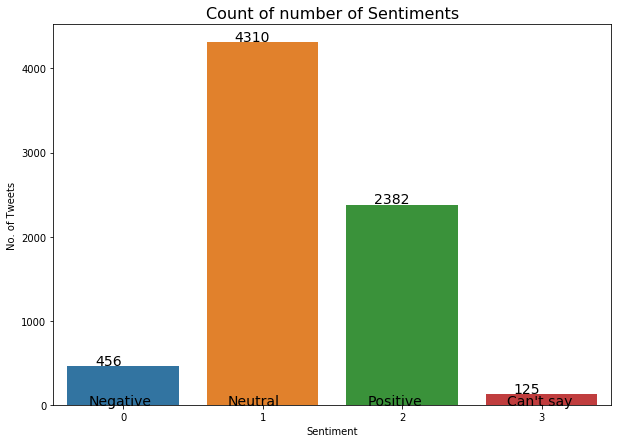

In [15]:
#Visualising the target variable
fig = plt.figure(figsize=(10, 7))
ax = sns.countplot(df.sentiment)
plt.title('Count of number of Sentiments', color='black', fontsize=16, )
for p in ax.patches:
    ax.text(x=p.get_x()+0.2, y=p.get_height()+20, s=str(p.get_height()), color='black', fontsize=14)
for num, label, val in zip([0, 1, 2, 3], ['Negative', 'Neutral', 'Positive', 'Can\'t say'], df.sentiment):
    plt.text(x=num-0.25, y=val/2, s=str(label), color='black', fontsize=14)
plt.xlabel('Sentiment')
plt.ylabel('No. of Tweets')
plt.show()

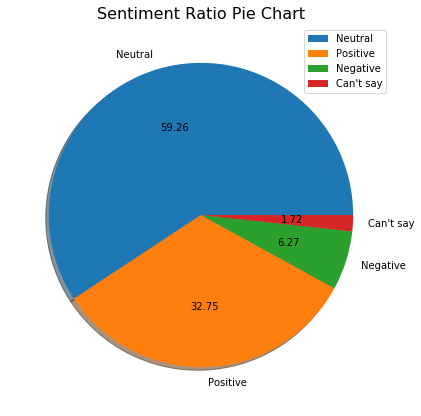

In [16]:
#pie chart for % data 
labels = ['Neutral', 'Positive', 'Negative', 'Can\'t say']
fig = plt.figure(figsize=(7, 7))
ax = plt.pie(df.sentiment.value_counts(), labels= labels, autopct='%.2f',shadow=True)
plt.title('Sentiment Ratio Pie Chart', color='black', fontsize=16)
plt.legend(labels, loc='best')
plt.show()

-------

-------

## Input Variable Analysis

In [17]:
#storing each sentiment tweet as a string
negative_tweet = ' '.join(list(df[df['sentiment']==0]['tweet']))
neutral_tweet = ' '.join(list(df[df['sentiment']==1]['tweet']))
positive_tweet = ' '.join(list(df[df['sentiment']==2]['tweet']))
undecided_tweet = ' '.join(list(df[df['sentiment']==3]['tweet']))

In [18]:
from wordcloud import WordCloud #For visualization

(-0.5, 399.5, 199.5, -0.5)

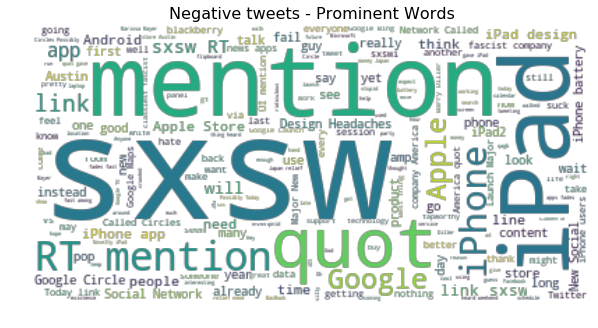

In [19]:
# Most prominent words for negative tweets

wordcloud = WordCloud(mode='RGBA', background_color=None).generate(negative_tweet)
plt.figure(figsize = (10, 8))
plt.title('Negative tweets - Prominent Words', fontsize=16)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

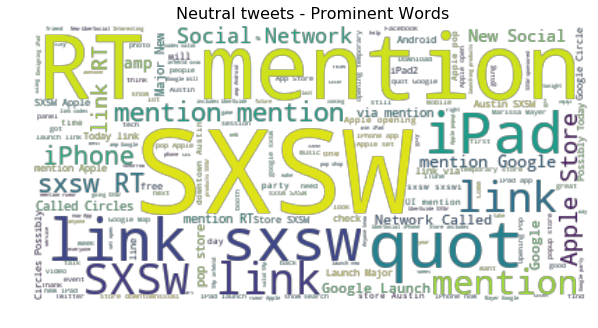

In [20]:
# Most prominent words for neutral tweets

wordcloud = WordCloud(mode='RGBA', background_color=None).generate(neutral_tweet)
plt.figure(figsize = (10, 8))
plt.title('Neutral tweets - Prominent Words', fontsize=16)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

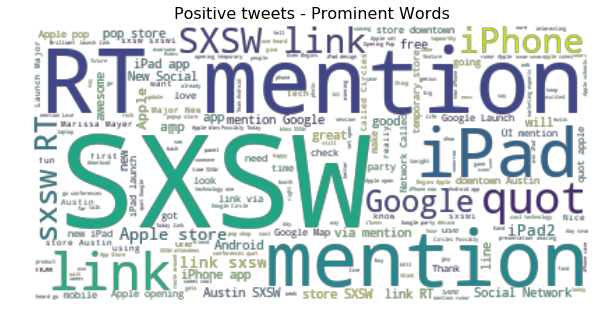

In [21]:
# Most prominent words for positive tweets

wordcloud = WordCloud(mode='RGBA', background_color=None).generate(positive_tweet)
plt.figure(figsize = (10, 8))
plt.title('Positive tweets - Prominent Words', fontsize=16)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

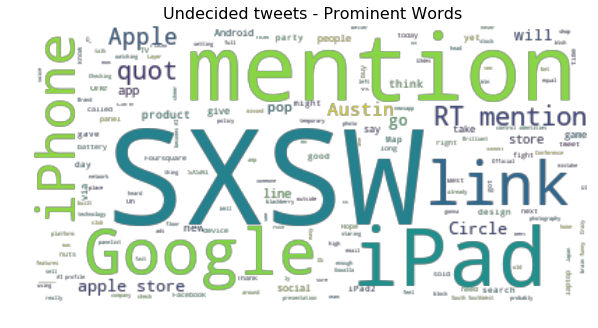

In [22]:
# Most prominent words for undecided tweets

wordcloud = WordCloud(mode='RGBA', background_color=None).generate(undecided_tweet)
plt.figure(figsize = (10, 8))
plt.title('Undecided tweets - Prominent Words', fontsize=16)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

From the above wordclouds we can see that the same words like Google, link, RT, IPhone, Apple, SXSW appear in all kinds of text and therefore will provide hardly any predictive power and therefore needs to be looked at processing stage.

----

In [23]:
# get a word count per tweet 
def word_count(sentence):
    return len(sentence.split())
    
df['word count'] = df['tweet'].apply(word_count)

In [24]:
#Getting the character count per tweet
df['char count'] = df.tweet.apply(lambda x: len(x))
df.head()

,tweet_id,tweet,sentiment,word count,char count
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,12,89
1,1851,Learning ab Google doodles! All doodles should...,1,19,143
2,2689,one of the most in-your-face ex. of stealing t...,2,22,132
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,19,125
4,3604,Line outside the Apple store in Austin waiting...,1,14,77


In [25]:
#looking for tweet with maximum and minimum characters
print ('Maximum number of characters in the tweet',df['char count'].max())
print ('Minimum number of characters in the tweet',df['char count'].min())

Maximum number of characters in the tweet 178
Minimum number of characters in the tweet 11


We can see that there is no anomally in the character limit as most of the tweets are well within the range of 280 characters

In [26]:
mean_ls = []
for i in range (0,4):
    mean_word = df[df['sentiment']==i]['word count'].mean()
    mean_char = df[df['sentiment']==i]['char count'].mean()
    mean_ls.append((mean_word, mean_char))
mean_df = pd.DataFrame(mean_ls, columns=['Mean word count','Mean character count'], 
                       index=['Negative', 'Neutral', 'Positive', 'Can\'t say'])

In [27]:
mean_df

,Mean word count,Mean character count
Negative,18.684211,108.923246
Neutral,17.386079,104.024362
Positive,18.220823,105.845088
Can't say,17.488000,101.784000


----

In [28]:
tweet_list = [negative_tweet, neutral_tweet, positive_tweet, undecided_tweet]
spl_list = []
for i in tweet_list:
    spl_chars = re.findall('\W', i)
    len_spl = len(spl_chars)
    tot_char = len(i)
    per_spl = (len_spl/tot_char)*100
    spl_list.append((spl_chars, len_spl, per_spl))
spl_char_df = pd.DataFrame(spl_list, columns=['Special Chars', 'Number of spl chars', 'Percentage of spl chars'], 
                           index=[['negative_tweet', 'neutral_tweet', 'positive_tweet', 'undecided_tweet']])
spl_char_df

,Special Chars,Number of spl chars,Percentage of spl chars
negative_tweet,"[ , , #, , , , , , , , , ', , , , ...",11499,22.941106
neutral_tweet,"[#, , #, , #, , , , , , , , , , , ...",107764,23.807146
positive_tweet,"[ , , , , -, -, , ., , , , , , , , ...",60592,23.807877
undecided_tweet,"[ , @, , , #, , , , ÷, , , , ., /, , ...",3000,23.351755


We can see that the number of special characters used in the tweets per sentiment is almost equal. Therefore we cannot say that special characters can provide us with predictive insights. Therefore we can safely say that processing can involve removing spl characters from each words

In [29]:
#number of special characters in 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell tweets
#anything that is not a word, not a number, not a white space will be found out

neg_spl = set(re.findall('\W', negative_tweet))
neu_spl = set(re.findall('\W', neutral_tweet))
pos_spl = set(re.findall('\W', positive_tweet))
cts_spl = set(re.findall('\W', undecided_tweet))

In [30]:
#unique number of special characters and the special characters in each tweet sentiment
print('Negative spl characters are:', neg_spl)
print ('='*50)
print('Neutral spl characters are:', neu_spl)
print ('='*50)
print('Positive spl characters are:', pos_spl)
print ('='*50)
print('Undecided spl characters are:', cts_spl)

Negative spl characters are: {"'", ';', '{', '&', '?', '%', '.', ',', '=', '$', '@', ':', '+', '\n', '\x9d', '(', '-', '#', '\x89', '/', '*', '}', ']', ')', '!', ' ', '[', '\r'}
Neutral spl characters are: {"'", '£', '\x8a', ';', '{', '\x80', '&', '±', '\x8c', '¤', '\x8d', '?', '\\', '%', '~', '.', ',', '÷', '|', '=', '$', '^', '¢', '@', ':', '+', '\n', '\x9d', '(', '\x89', '#', '-', '\x8f', '\x8b', '/', '\xa0', '*', '}', ']', ')', '«', '!', ' ', '`', '[', '\r', '\x8e', '¡', '\x95', '»', '¬', '\x81', '©'}
Positive spl characters are: {"'", '\x8a', ';', '{', '&', '\x8c', '\x8d', '?', '%', '~', '.', ',', '÷', '|', '=', '$', '^', '@', ':', '+', '\n', '\x9d', '(', '-', '#', '\x89', '\x8f', '´', '/', '*', '}', ']', ')', '«', '!', ' ', '[', '\r', '¡', '©', '\x84'}
Undecided spl characters are: {"'", ';', '{', '&', '¤', '?', '%', '.', '÷', ',', '=', '@', ':', '+', '\x9d', '\n', '(', '\x89', '#', '-', '/', '*', '}', ')', '!', ' ', '`', '\r'}


______

In [31]:
tweet_list = [negative_tweet, neutral_tweet, positive_tweet, undecided_tweet]
mentions_list = []
for i in tweet_list:
    len_men = len(re.findall(r'@\w+', i))
    tot_words = len(i.split())
    per_men = (len_men/tot_words)*100
    mentions_list.append((len_men, per_men))
mentions_df = pd.DataFrame(mentions_list, columns=['Number of mentions', 'Percentage of mentions to words'], 
                           index=[['negative_tweet', 'neutral_tweet', 'positive_tweet', 'undecided_tweet']])
mentions_df

,Number of mentions,Percentage of mentions to words
negative_tweet,252,2.957746
neutral_tweet,3665,4.890971
positive_tweet,1763,4.062025
undecided_tweet,80,3.659652


From the above pattern we can see that least mentions occur in case of negative tweets and most in case of neutral tweets however, there is no drastic change in the mentions per sentiment. Also since mentions occur as @mentions, these appear to be masked and therefore provide no predictive power as such.

----

In [32]:
tweet_list = [negative_tweet, neutral_tweet, positive_tweet, undecided_tweet]
hash_list = []
for i in tweet_list:
    hash_ls = re.findall(r'#\w+', i)
    len_hash = len(re.findall(r'#\w+', i))
    tot_words = len(i.split())
    per_hash = (len_hash/tot_words)*100
    hash_list.append((hash_ls, len_hash, per_hash))
hashtags_df = pd.DataFrame(hash_list, columns=['Hashtags', 'Number of hashtags', 'Percentage of hashtags to words'], 
                           index=[['negative_tweet', 'neutral_tweet', 'positive_tweet', 'undecided_tweet']])
hashtags_df

,Hashtags,Number of hashtags,Percentage of hashtags to words
negative_tweet,"[#SXSW, #Fuckit, #Illmakeitwork, #RISE_Austin,...",732,8.591549
neutral_tweet,"[#sxswnui, #sxsw, #apple, #GoogleDoodle, #sxsw...",7726,10.310406
positive_tweet,"[#SXSW, #SXSW, #FreeMusic, #sxsw, #SXSW, #elev...",4009,9.236902
undecided_tweet,"[#SXSW, #android, #iphone, #ipad, #sxsw, #SXSW...",200,9.149131


----

In [33]:
tweet_list = [negative_tweet, neutral_tweet, positive_tweet, undecided_tweet]
caps_list = []
for i in tweet_list:
    caps_ls = re.findall(r'\b[A-Z]{2,}\b', i)
    set_cap = len(set(re.findall(r'\b[A-Z]{2,}\b', i)))
    len_caps = len(re.findall(r'\b[A-Z]{2,}\b', i))
    tot_words = len(i.split())
    per_caps = (len_caps/tot_words)*100
    caps_list.append((caps_ls, len_caps, set_cap, per_caps))
capital_df = pd.DataFrame(caps_list, columns=['Capital Words','Number of Capital words','Unique capital words', 'Percentage of capitalwords to total words'], 
                           index=[['negative_tweet', 'neutral_tweet', 'positive_tweet', 'undecided_tweet']])
capital_df

,Capital Words,Number of Capital words,Unique capital words,Percentage of capitalwords to total words
negative_tweet,"[SXSW, SXSW, FTP, RT, SXSW, SXSW, SXSW, SXSW, ...",411,79,4.823944
neutral_tweet,"[SXSW, SXSW, SXSW, SXSW, NPR, NU, RT, SXSW, RT...",4785,376,6.385619
positive_tweet,"[RT, SXSW, SXSW, SXSW, RT, RT, SXSW, SXSW, RT,...",2461,229,5.670246
undecided_tweet,"[RT, SXSW, SXSW, GO, SXSW, SXSW, SXSW, SXSW, D...",122,27,5.580970


----

In [34]:
tweet_list = [negative_tweet, neutral_tweet, positive_tweet, undecided_tweet]
excl_list = []
for i in tweet_list:
    len_excl = len(re.findall(r'!|\?', i))
    tot_chars = len(i)
    spl_chars = len(re.findall('\W', i))
    per_excl_tot = (len_excl/tot_chars)*100
    per_excl_spl = (len_excl/spl_chars)*100
    excl_list.append((len_excl, per_excl_tot, per_excl_spl))
excl_df = pd.DataFrame(excl_list, columns=['Number of Exclamation marks', 'Percentage of exclamation marks to total', 'Percentage of exclamation marks to spl chars'], 
                           index=[['negative_tweet', 'neutral_tweet', 'positive_tweet', 'undecided_tweet']])
excl_df

,Number of Exclamation marks,Percentage of exclamation marks to total,Percentage of exclamation marks to spl chars
negative_tweet,165,0.329184,1.434907
neutral_tweet,1751,0.386830,1.624847
positive_tweet,1307,0.513548,2.157050
undecided_tweet,53,0.412548,1.766667


---

Steps taken to clean the tweets.
Decoding: unicode_escape for extra “\” before unicode character, then unidecode
Apostrophe handled: there are two characters people use for contraction. “’”(apostrophe) and “‘“(single quote). If these two symbols are both used for contraction, it will be difficult to detect and properly map the right expanded form. So any “’”(apostrophe) is changed to “‘“(single quote)
Contraction check: check if there’s any contracted form, and replace it with its original form
Parsing: done with Spacy
Filtering punctuation, white space, numbers, URL using Spacy methods while keeping the text content of hashtag intact
Removed @mention
Lemmatize: lemmatized each token using Spacy method ‘.lemma_’. Pronouns are kept as they are since Spacy lemmatizer transforms every pronoun to “-PRON-”
Special character removal
Single syllable token removal
Spell correction: it is a simple spell correction dealing with repeated characters such as “sooooo goooood”. If the same character is repeated more than two times, it shortens the repetition to two. For example “sooooo goooood” will be transformed as “soo good”. This is not a perfect solution since even after correction, in case of “soo”, it is not a correct spelling. But at least it will help to reduce feature space by making “sooo”, “soooo”, “sooooo” to the same word “soo”

In [35]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" } 

In [37]:
! pip install unidecode

In [41]:
! pip install spacy

In [48]:
! python -m spacy download en_core_web_sm


  Running setup.py install for en-core-web-sm: started
    Running setup.py install for en-core-web-sm: finished with status 'done'
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [53]:
import codecs
import unidecode
import re
import spacy
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [ ]:
def spacy_cleaner(text):
    try:
        decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
    except:
        decoded = unidecode.unidecode(text)
    apostrophe_handled = re.sub("’", "'", decoded)
    expanded = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in apostrophe_handled.split(" ")])
    parsed = nlp(expanded)
    final_tokens = []
    for t in parsed:
        if t.is_punct or t.is_space or t.like_num or t.like_url or str(t).startswith('@'):
            pass
        else:
            if t.lemma_ == '-PRON-':
                final_tokens.append(str(t))
            else:
                sc_removed = re.sub("[^a-zA-Z]", '', str(t.lemma_))
                if len(sc_removed) > 1:
                    final_tokens.append(sc_removed)
    joined = ' '.join(final_tokens)
    spell_corrected = re.sub(r'(.)\1+', r'\1\1', joined)
    return spell_corrected

In [ ]:
pd.set_option('display.max_colwidth', -1)
df.tweet[:10]

In [ ]:
[spacy_cleaner(t) for t in df.tweet[:10]]

It seems that our code is doing its intended work and therefore we can try it on our dataset

In [ ]:
df['clean_tweet'] = [spacy_cleaner(t) for t in df.tweet]

for i,t in enumerate(df.text):
    if 'insert error' in t:
        print(i,t)

In [ ]:
df.drop(columns=['word count', 'char count'], inplace=True)

In [ ]:
df.head()

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
whitelist = ['was', 'did', 'but', 'against', 'not', 'no' , 'nor', 'over', 'under', 'again', 'few', 'more', 'most', 'too', 'very', 'couldn',
 'couldn\'t', 'don\'t','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",
'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",
'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

In [ ]:
stop_words = [i for i in stop_words if i not in whitelist]

In [ ]:
stop_words = stop_words + ['link', 'RT', 'quot', 'amp', 'sxsw', 'ipad', 'apple', 'google']

In [ ]:
len(stop_words)

In [ ]:
def preprocess_text(text):
    '''
    Preprocess text
    '''
    # lower case 
    # trim / strip whitespaces
    # stop words removal
    # retain words above length 2
    # retain only letters and numbers
    
    return ' '.join([i.strip().lower() for 
                     i in re.sub('\W', ' ', text).split() if 
                     len(i)>2 and i not in stop_words])

In [ ]:
df['processed_tweet'] = df['clean_tweet'].map(lambda x: preprocess_text(x))

In [ ]:
df.head()

In [ ]:
# get most common words in training dataset
from collections import Counter

all_words = []
for line in list(df['processed_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())

In [ ]:
Counter(all_words).most_common(25)

In [ ]:
sm = SMOTE()
ros = RandomOverSampler()
rfc = RandomForestClassifier(n_estimators=10)
smt = SMOTETomek()

In [ ]:
tfv = TfidfVectorizer(stop_words=None, lowercase=False, ngram_range=(1,2))
lr = LogisticRegression()

In [ ]:
X = df.processed_tweet
y = df.sentiment

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=7)

In [ ]:
X_train_vect = X_train_vect = tfv.fit_transform(X_train)

In [ ]:
X_train_vect.shape

In [ ]:
X_sm, y_sm = sm.fit_resample(X_train_vect, y_train)

In [ ]:
X_ros, y_ros = ros.fit_resample(X_train_vect, y_train)

In [ ]:
X_smt, y_smt = smt.fit_resample(X_train_vect, y_train)

In [ ]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_sm, y_sm)
    y_pred = lr.predict(tfv.transform(X_test))
    print ("Accuracy for C=%s: %s" 
           % (c,f1_score(y_test, y_pred, average='weighted')))
accuracy_score(y_test, y_pred)

In [ ]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_smt, y_smt)
    y_pred = lr.predict(tfv.transform(X_test))
    print ("Accuracy for C=%s: %s" 
           % (c, f1_score(y_test, y_pred, average='weighted')))
accuracy_score(y_test, y_pred)

In [ ]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_ros, y_ros)
    y_pred = lr.predict(tfv.transform(X_test))
    print ("Accuracy for C=%s: %s" 
           % (c, f1_score(y_test, y_pred, average='weighted')))
accuracy_score(y_test, y_pred)

In [ ]:
rfc.fit(X_sm, y_sm)
y_pred = rfc.predict(tfv.transform(X_test))
print ('f1 score:', f1_score(y_test, y_pred, average='weighted'))
print ('accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
rfc.fit(X_smt, y_smt)
y_pred = rfc.predict(tfv.transform(X_test))
print ('f1 score:', f1_score(y_test, y_pred, average='weighted'))
print ('accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
rfc.fit(X_ros, y_ros)
y_pred = rfc.predict(tfv.transform(X_test))
print ('f1 score:', f1_score(y_test, y_pred, average='weighted'))
print ('accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
vect = CountVectorizer(ngram_range=(1,1))

In [ ]:
X = df.processed_tweet
y = df.sentiment

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=7)

In [ ]:
X_train_count = vect.fit_transform(X_train)

In [ ]:
X_train_count.shape

In [ ]:
X_sm, y_sm = sm.fit_resample(X_train_count, y_train)
X_ros, y_ros = ros.fit_resample(X_train_count, y_train)
X_smt, y_smt = smt.fit_resample(X_train_count, y_train)

In [ ]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_sm, y_sm)
    y_pred = lr.predict(vect.transform(X_test))
    print ("Accuracy for C=%s: %s" 
           % (c,f1_score(y_test, y_pred, average='weighted')))
accuracy_score(y_test, y_pred)

In [ ]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_ros, y_ros)
    y_pred = lr.predict(vect.transform(X_test))
    print ("Accuracy for C=%s: %s" 
           % (c,f1_score(y_test, y_pred, average='weighted')))
accuracy_score(y_test, y_pred)

In [ ]:
#Creating dataset for each sentiment
negative_df = df[df['sentiment']==0]
neutral_df = df[df['sentiment']==1]
positive_df = df[df['sentiment']==2]
undecided_df = df[df['sentiment']==3]

def entity(text):
        doc = nlp(text)
        return [ent.text for ent in doc.ents]